In [13]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

In [14]:
def get_date_from_filename(filename):
    datestring = filename[2:10]
    date = dt.strptime(datestring, '%Y%m%d')
    
    return date

In [15]:
# Load all the snowdepth rasters and stack them into an ndarray

# Specify the folder that has our ASO snow depth rasters
folder = r'C:/Users/steve/git/whw2019_snowmelt/data/aso_masked/2016/'

date = []
snowdepth = np.zeros((1684,1777))

# Loop through here and find each .tif, then apply the mask and write a new .tif file
for _,_,filenames in os.walk(folder):
    for file in filenames:
        fileExt=os.path.splitext(file)[-1]
        if fileExt == '.tif':
            with rio.open(folder+file,'r') as src:
                date.append(get_date_from_filename(file))
                snowdepth = np.dstack((snowdepth,src.read(1)))

# Remove the "np.zeros" array which is in the 0th position
snowdepth = snowdepth[:,:,1:]  

# Sort the data in chronological order
date_idx = date.argsort()
date = date[date_idx[::1]]
snowdepth = snowdepth[:,:,date_idx[::1]]

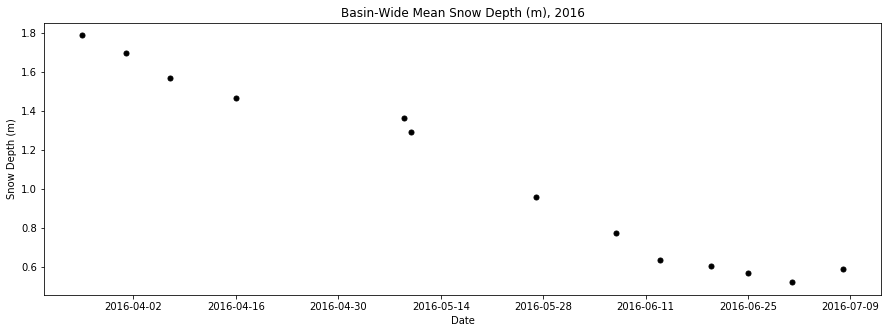

In [32]:
plt.figure(figsize=(15,5))
plt.plot(date,np.nanmean(snowdepth,axis=(0,1)),'.k',markersize=10)
plt.ylabel('Snow Depth (m)')
plt.xlabel('Date')
plt.title('Basin-Wide Mean Snow Depth (m), 2016');

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


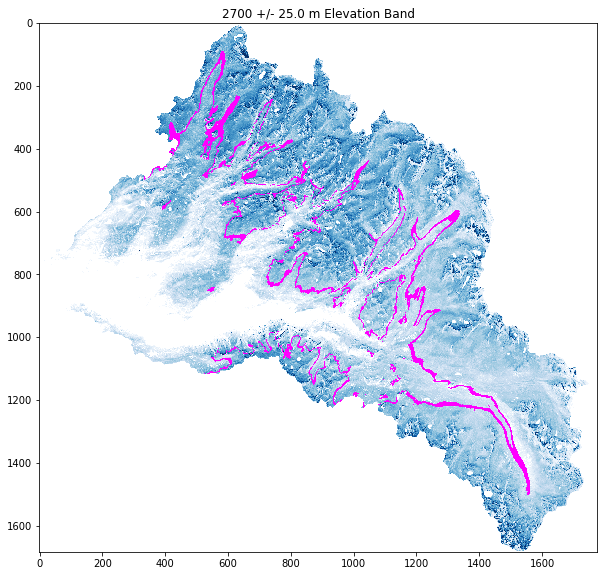

In [75]:
# Create an array to visualize a single elevation band:

# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(r'C:/Users/steve/git/whw2019_snowmelt/data/masked_dem30m.tif')
elev = dem.read(1)

# Make a nan array of the same shape
elev_band_array = np.full([elev.shape[0], elev.shape[1]], np.nan)

# Set pixels within our elevation band to a value:
elev_band = 2700 # elevation in meters
band_width = 50 # +/- 1/2 of the width in meters
half_width = band_width / 2
lower = elev_band - half_width
upper = elev_band + half_width

# Find the indices in the DEM data that correspond to our elevation band
elev_idx = np.where( (elev > lower) & (elev < upper) )

# Wherever our elevation band criteria is met, set that value to 1 in our elevation band array
elev_band_array[elev_idx] = 1

# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev_band_array,cmap='spring',zorder=1)
plt.imshow(snowdepth[:,:,0],cmap='Blues',vmin=0,vmax=5,zorder=0)
title_text = '{} +/- {} m Elevation Band'.format(elev_band,half_width)
plt.title(title_text);

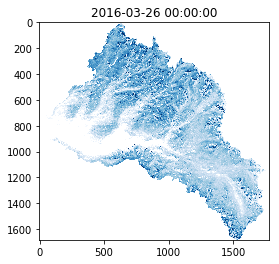

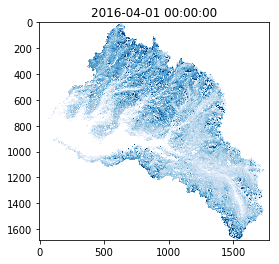

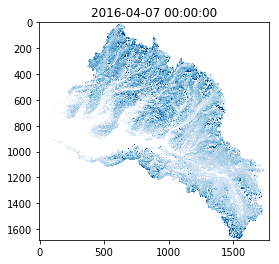

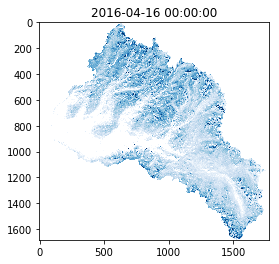

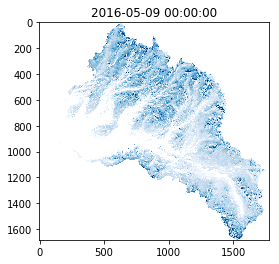

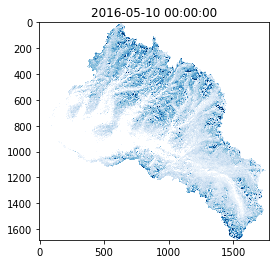

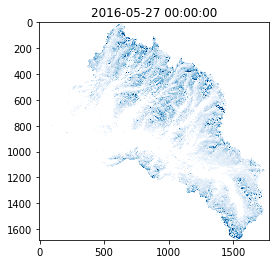

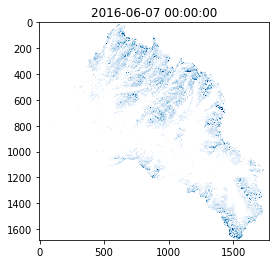

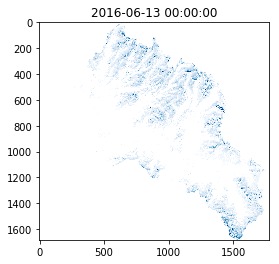

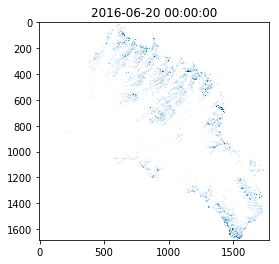

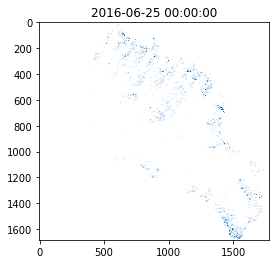

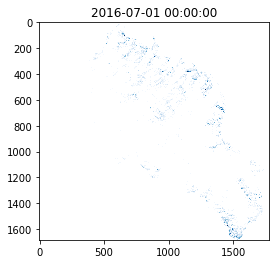

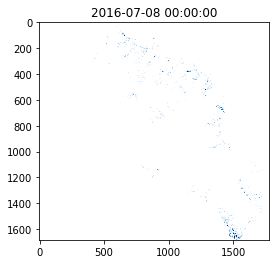

In [73]:
for i in range(0,snowdepth.shape[2]):
    plt.figure()
    plt.imshow(snowdepth[:,:,i],cmap='Blues',vmin=0,vmax=5)
    plt.title(str(date[i]))